In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import csv
import os
import matplotlib.ticker as ticker
import dateparser

In [ ]:
comments_path = os.path.join(os.path.expanduser("~"), "Desktop\\TrendyolMilla\\03_Data_Labelization\\Data", "comments_final_labels.csv") 

df_comments = pd.read_csv(comments_path)

df_comments.head()

,Tarih,Boy,Kilo,Beden,Yorum,Ürün Adı,Yorum_V1,Yorum Uzunluğu,Yorum_V2,savasy_label,...,joeddav_label,joeddav_skor,kaixkhazaki_label,kaixkhazaki_skor,MoritzLaurer_label,MoritzLaurer_skor,ZeroShot_label,ZeroShot_skor,final_label,final_skor
0,17 Şubat 2025,168cm,55,S,"Çok güzel 1.68 ,55 kilo s beden tam oldu",TRENDYOLMİLLA Siyah Düz Dokulu Fitted/Vücuda O...,"Çok güzel 1.68 ,55 kilo s beden tam oldu",40,"çok güzel 1.68 ,55 kilo s beden tam oldu",olumlu,...,olumlu,0.997684,olumlu,0.930659,olumlu,0.984298,olumlu,0.970880,olumlu,0.959417
1,14 Şubat 2025,165cm,59,S,Boyum 1.65 bi tik daha uzun olsa elbise iyi ol...,TRENDYOLMİLLA Siyah Düz Dokulu Fitted/Vücuda O...,Boyum 1.65 bir tık daha uzun olsa elbise iyi o...,135,boyum 1.65 bir tık daha uzun olsa elbise iyi o...,olumsuz,...,olumlu,0.936270,olumlu,0.857906,olumsuz,-0.775901,olumlu,0.339425,olumlu,0.250283
2,23 Aralık 2024,168cm,60,S,1.68 boy 60 kilo s beden cuk oturdu. Wow değil...,TRENDYOLMİLLA Siyah Düz Dokulu Fitted/Vücuda O...,1.68 boy 60 kilo s beden cuk oturdu. Wow değil...,203,1.68 boy 60 kilo s beden cuk oturdu. wow değil...,olumsuz,...,olumlu,0.990739,olumlu,0.886708,olumlu,0.897199,olumlu,0.924882,olumlu,0.924882
3,03 Şubat 2025,Bilgi mevcut değil,Bilgi mevcut değil,M,"çok beğendim, kumaşı farklı ve gerçekten çok şık",TRENDYOLMİLLA Siyah Düz Dokulu Fitted/Vücuda O...,"çok beğendim, kumaşı farklı ve gerçekten çok şık",48,"çok beğendim, kumaşı farklı ve gerçekten çok şık",olumlu,...,olumlu,0.993717,olumlu,0.956035,olumlu,0.985931,olumlu,0.978561,olumlu,0.959421
4,01 Şubat 2025,157cm,46,S,Xs uzun süredir gelmediği için s aldım 157*46 ...,TRENDYOLMİLLA Siyah Düz Dokulu Fitted/Vücuda O...,Xs uzun süredir gelmediği için s aldım 157*46 ...,140,xs uzun süredir gelmediği için s aldım 157*46 ...,olumsuz,...,olumsuz,-0.631333,olumlu,0.595040,olumsuz,-0.520216,olumsuz,-0.185503,olumsuz,-0.144843


In [ ]:
pd.set_option('display.max_colwidth', None)  
pd.set_option('display.max_rows', None)  
pd.set_option('display.max_columns', None) 

In [ ]:
products_times_and_labels_path = os.path.join(os.path.expanduser("~"), "Desktop\\TrendyolMilla\\04_Data_Time_Series\\Data", "products_times_and_labels.csv") 

df_products_times_and_labels = pd.read_csv(products_times_and_labels_path)

df_products_times_and_labels.head()

,Ürün Adı,Adet,min_date,max_date,date_diff,olumlu_sayi,olumsuz_sayi
0,TRENDYOLMİLLA Siyah Vücuda Oturan Degaje Yaka Midi Askılı Esnek Örme Midi Kalem Elbise TWOSS19AD0020,885,2022-03-22,2025-02-17,1063,802,83
1,TRENDYOLMİLLA Siyah Vücuda Oturan Mini Dik Yaka Fitilli Esnek Örme Kalem Elbise TWOAW21EL2244,712,2022-03-21,2025-03-10,1085,614,98
2,TRENDYOLMİLLA Siyah Fitted/ Vücuda Oturan Kolsuz Drape Detaylı Kemerli Midi Esnek Örme Kalem Elbise TWOSS22EL0756,706,2022-03-24,2025-03-07,1079,667,39
3,TRENDYOLMİLLA Lacivert Vücuda Oturan Degaje Yaka Midi Askılı Esnek Örme Midi Kalem Elbise TWOSS19AD0020,540,2022-03-13,2025-02-27,1082,518,22
4,TRENDYOLMİLLA Siyah Fitilli Kare Yaka Vücuda Oturan Uzun Kol Yırtmaçlı Midi Elbise TWOAW22EL0871,504,2022-04-15,2025-03-10,1060,451,53


In [ ]:
columns_to_use = ['Tarih','Boy','Kilo','Beden' ,'Ürün Adı', 'Yorum_V1',  'final_label', 'final_skor']

df_comments = df_comments[columns_to_use].copy()

df_comments.head()

,Tarih,Boy,Kilo,Beden,Ürün Adı,Yorum_V1,final_label,final_skor
0,17 Şubat 2025,168cm,55,S,TRENDYOLMİLLA Siyah Düz Dokulu Fitted/Vücuda O...,"Çok güzel 1.68 ,55 kilo s beden tam oldu",olumlu,0.959417
1,14 Şubat 2025,165cm,59,S,TRENDYOLMİLLA Siyah Düz Dokulu Fitted/Vücuda O...,Boyum 1.65 bir tık daha uzun olsa elbise iyi o...,olumlu,0.250283
2,23 Aralık 2024,168cm,60,S,TRENDYOLMİLLA Siyah Düz Dokulu Fitted/Vücuda O...,1.68 boy 60 kilo s beden cuk oturdu. Wow değil...,olumlu,0.924882
3,03 Şubat 2025,Bilgi mevcut değil,Bilgi mevcut değil,M,TRENDYOLMİLLA Siyah Düz Dokulu Fitted/Vücuda O...,"çok beğendim, kumaşı farklı ve gerçekten çok şık",olumlu,0.959421
4,01 Şubat 2025,157cm,46,S,TRENDYOLMİLLA Siyah Düz Dokulu Fitted/Vücuda O...,Xs uzun süredir gelmediği için s aldım 157*46 ...,olumsuz,-0.144843


In [ ]:
df_comments = df_comments.dropna(subset=['Tarih'])

df_comments = df_comments.reset_index(drop=True)

df_comments = df_comments[df_comments["Tarih"] != "Fenomen"]
df_comments.head()

,Tarih,Boy,Kilo,Beden,Ürün Adı,Yorum_V1,final_label,final_skor
0,17 Şubat 2025,168cm,55,S,TRENDYOLMİLLA Siyah Düz Dokulu Fitted/Vücuda O...,"Çok güzel 1.68 ,55 kilo s beden tam oldu",olumlu,0.959417
1,14 Şubat 2025,165cm,59,S,TRENDYOLMİLLA Siyah Düz Dokulu Fitted/Vücuda O...,Boyum 1.65 bir tık daha uzun olsa elbise iyi o...,olumlu,0.250283
2,23 Aralık 2024,168cm,60,S,TRENDYOLMİLLA Siyah Düz Dokulu Fitted/Vücuda O...,1.68 boy 60 kilo s beden cuk oturdu. Wow değil...,olumlu,0.924882
3,03 Şubat 2025,Bilgi mevcut değil,Bilgi mevcut değil,M,TRENDYOLMİLLA Siyah Düz Dokulu Fitted/Vücuda O...,"çok beğendim, kumaşı farklı ve gerçekten çok şık",olumlu,0.959421
4,01 Şubat 2025,157cm,46,S,TRENDYOLMİLLA Siyah Düz Dokulu Fitted/Vücuda O...,Xs uzun süredir gelmediği için s aldım 157*46 ...,olumsuz,-0.144843


Örnek Ürün Üzerinde Zaman Serisi

In [ ]:
urun_adi = "TRENDYOLMİLLA Siyah Vücuda Oturan Degaje Yaka Midi Askılı Esnek Örme Midi Kalem Elbise TWOSS19AD0020"
df_comments[df_comments['Ürün Adı'] == urun_adi].head()

,Tarih,Boy,Kilo,Beden,Ürün Adı,Yorum_V1,final_label,final_skor
30192,15 Haziran 2023,Bilgi mevcut değil,Bilgi mevcut değil,Bilgi mevcut değil,TRENDYOLMİLLA Siyah Vücuda Oturan Degaje Yaka Midi Askılı Esnek Örme Midi Kalem Elbise TWOSS19AD0020,Çok güzel 110 kg L beden aldım tam üstüme oturdu rahat bir elbise. Fiyatıda çok uygun. Esnek yapısı var.,olumlu,0.837216
30193,04 Ekim 2024,163cm,59,M,TRENDYOLMİLLA Siyah Vücuda Oturan Degaje Yaka Midi Askılı Esnek Örme Midi Kalem Elbise TWOSS19AD0020,çok şık ben çok beğendim,olumlu,0.862705
30194,19 Eylül 2024,Bilgi mevcut değil,Bilgi mevcut değil,M,TRENDYOLMİLLA Siyah Vücuda Oturan Degaje Yaka Midi Askılı Esnek Örme Midi Kalem Elbise TWOSS19AD0020,harika bir elbise 60 kilo M beden kumaşı falan çok güzel esnek s bile olabilirdi ama ben çok yapışmasını istemedim,olumlu,0.490921
30195,24 Ağustos 2024,164cm,58,S,TRENDYOLMİLLA Siyah Vücuda Oturan Degaje Yaka Midi Askılı Esnek Örme Midi Kalem Elbise TWOSS19AD0020,Elbise çok güzel ama bana yakışmadı sanki yada beden olarak bir büyük almam lazımmış bir tık dökümlü durması adına çok kararsızım iade edip etmemekde 164 boy 57 kilo s beden almiştim,olumlu,0.024127
30196,19 Ağustos 2024,Bilgi mevcut değil,Bilgi mevcut değil,M,TRENDYOLMİLLA Siyah Vücuda Oturan Degaje Yaka Midi Askılı Esnek Örme Midi Kalem Elbise TWOSS19AD0020,158 70 kg 9 aylık gebeyim m beden tam oldu,olumlu,0.400195


In [ ]:
urun_adi = "TRENDYOLMİLLA Siyah Vücuda Oturan Degaje Yaka Midi Askılı Esnek Örme Midi Kalem Elbise TWOSS19AD0020"

df_tek_urun = df_comments[df_comments['Ürün Adı'] == urun_adi].copy()
df_tek_urun['Tarih'] = df_tek_urun['Tarih'].apply(lambda x: dateparser.parse(x, languages=['tr']))

df_tek_urun.head()

,Tarih,Boy,Kilo,Beden,Ürün Adı,Yorum_V1,final_label,final_skor
30192,2023-06-15,Bilgi mevcut değil,Bilgi mevcut değil,Bilgi mevcut değil,TRENDYOLMİLLA Siyah Vücuda Oturan Degaje Yaka Midi Askılı Esnek Örme Midi Kalem Elbise TWOSS19AD0020,Çok güzel 110 kg L beden aldım tam üstüme oturdu rahat bir elbise. Fiyatıda çok uygun. Esnek yapısı var.,olumlu,0.837216
30193,2024-10-04,163cm,59,M,TRENDYOLMİLLA Siyah Vücuda Oturan Degaje Yaka Midi Askılı Esnek Örme Midi Kalem Elbise TWOSS19AD0020,çok şık ben çok beğendim,olumlu,0.862705
30194,2024-09-19,Bilgi mevcut değil,Bilgi mevcut değil,M,TRENDYOLMİLLA Siyah Vücuda Oturan Degaje Yaka Midi Askılı Esnek Örme Midi Kalem Elbise TWOSS19AD0020,harika bir elbise 60 kilo M beden kumaşı falan çok güzel esnek s bile olabilirdi ama ben çok yapışmasını istemedim,olumlu,0.490921
30195,2024-08-24,164cm,58,S,TRENDYOLMİLLA Siyah Vücuda Oturan Degaje Yaka Midi Askılı Esnek Örme Midi Kalem Elbise TWOSS19AD0020,Elbise çok güzel ama bana yakışmadı sanki yada beden olarak bir büyük almam lazımmış bir tık dökümlü durması adına çok kararsızım iade edip etmemekde 164 boy 57 kilo s beden almiştim,olumlu,0.024127
30196,2024-08-19,Bilgi mevcut değil,Bilgi mevcut değil,M,TRENDYOLMİLLA Siyah Vücuda Oturan Degaje Yaka Midi Askılı Esnek Örme Midi Kalem Elbise TWOSS19AD0020,158 70 kg 9 aylık gebeyim m beden tam oldu,olumlu,0.400195


In [ ]:
df_tek_urun['label_binary'] = df_tek_urun['final_label'].map({'olumlu': 1, 'olumsuz': 0})

df_tek_urun['gun'] = df_tek_urun['Tarih'].dt.date

daily_olumlu = df_tek_urun.groupby('gun')['label_binary'].sum()


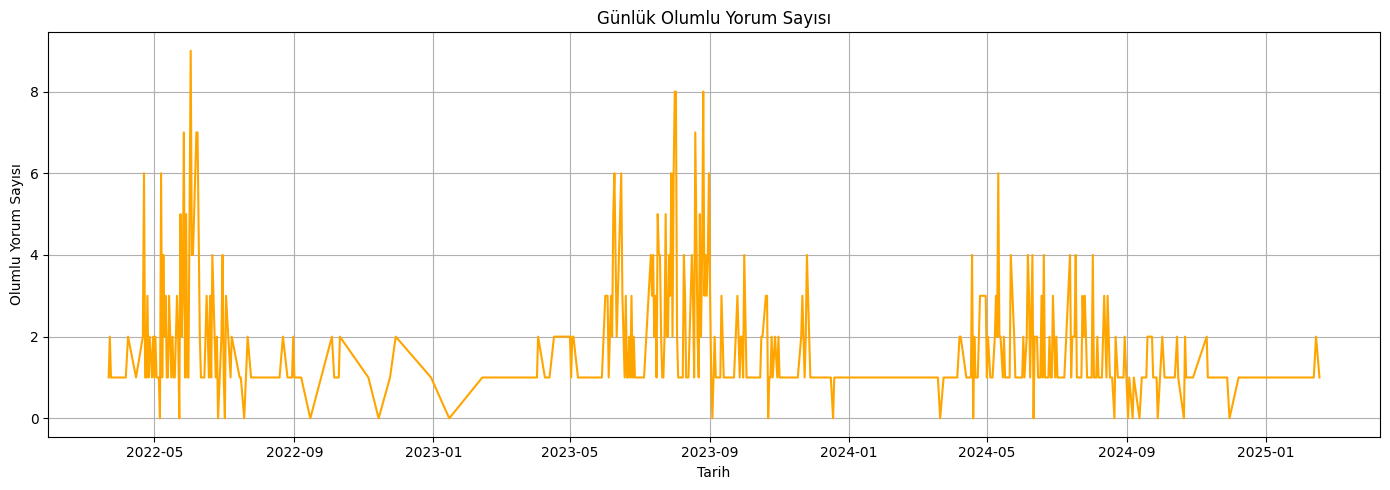

In [ ]:
plt.figure(figsize=(14, 5))
daily_olumlu.plot(title="Günlük Olumlu Yorum Sayısı", color="orange")
plt.xlabel("Tarih")
plt.ylabel("Olumlu Yorum Sayısı")
plt.grid(True)
plt.tight_layout()
plt.show()

Ürün Trendlerini Çıkarmak

In [ ]:
df_comments['Tarih'] = df_comments['Tarih'].apply(lambda x: dateparser.parse(x, languages=['tr']))

df_comments['label_binary'] = df_comments['final_label'].map({'olumlu': 1, 'olumsuz': 0})

df_comments['Yıl_Ay'] = df_comments['Tarih'].dt.to_period('M')  

agg = df_comments.groupby(['Ürün Adı', 'Yıl_Ay'])['label_binary'].agg(['sum', 'count']).reset_index()

agg.head()

,Ürün Adı,Yıl_Ay,sum,count
0,Edit by Trendyol Bordo Bordo Elbise Fitted Örme Elbise TEDAW25EL00028,2024-10,2,2
1,Edit by Trendyol Bordo Bordo Elbise Fitted Örme Elbise TEDAW25EL00028,2024-11,3,4
2,Edit by Trendyol Bordo Bordo Elbise Fitted Örme Elbise TEDAW25EL00028,2024-12,1,2
3,Edit by Trendyol Bordo Bordo Elbise Fitted Örme Elbise TEDAW25EL00028,2025-02,1,1
4,Edit by Trendyol Bordo Bordo Elbise Fitted Örme Elbise TEDAW25EL00028,2025-03,1,1


In [ ]:
agg['Olumlu Yorum Sayısı'] = agg['sum']
agg['Toplam Yorum Sayısı'] = agg['count']
agg['Olumlu Oranı'] = agg['sum'] / agg['count']

agg = agg.drop(columns=['sum','count']).reset_index( drop = True)
agg.head()

,Ürün Adı,Yıl_Ay,Olumlu Yorum Sayısı,Toplam Yorum Sayısı,Olumlu Oranı
0,Edit by Trendyol Bordo Bordo Elbise Fitted Örme Elbise TEDAW25EL00028,2024-10,2,2,1.00
1,Edit by Trendyol Bordo Bordo Elbise Fitted Örme Elbise TEDAW25EL00028,2024-11,3,4,0.75
2,Edit by Trendyol Bordo Bordo Elbise Fitted Örme Elbise TEDAW25EL00028,2024-12,1,2,0.50
3,Edit by Trendyol Bordo Bordo Elbise Fitted Örme Elbise TEDAW25EL00028,2025-02,1,1,1.00
4,Edit by Trendyol Bordo Bordo Elbise Fitted Örme Elbise TEDAW25EL00028,2025-03,1,1,1.00


In [ ]:
df_products_times_and_labels_urunler = df_products_times_and_labels['Ürün Adı'].unique()

eksik_urunler = agg[~agg['Ürün Adı'].isin(df_products_times_and_labels_urunler)]

eksik_urunler.head()

,Ürün Adı,Yıl_Ay,Olumlu Yorum Sayısı,Toplam Yorum Sayısı,Olumlu Oranı
0,Edit by Trendyol Bordo Bordo Elbise Fitted Örme Elbise TEDAW25EL00028,2024-10,2,2,1.00
1,Edit by Trendyol Bordo Bordo Elbise Fitted Örme Elbise TEDAW25EL00028,2024-11,3,4,0.75
2,Edit by Trendyol Bordo Bordo Elbise Fitted Örme Elbise TEDAW25EL00028,2024-12,1,2,0.50
3,Edit by Trendyol Bordo Bordo Elbise Fitted Örme Elbise TEDAW25EL00028,2025-02,1,1,1.00
4,Edit by Trendyol Bordo Bordo Elbise Fitted Örme Elbise TEDAW25EL00028,2025-03,1,1,1.00


In [ ]:
eksik_urunler.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4724 entries, 0 to 14672
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype    
---  ------               --------------  -----    
 0   Ürün Adı             4724 non-null   object   
 1   Yıl_Ay               4724 non-null   period[M]
 2   Olumlu Yorum Sayısı  4724 non-null   int64    
 3   Toplam Yorum Sayısı  4724 non-null   int64    
 4   Olumlu Oranı         4724 non-null   float64  
dtypes: float64(1), int64(2), object(1), period[M](1)
memory usage: 221.4+ KB


In [ ]:
urun_bazli_ay_sayisi = (
    eksik_urunler
    .groupby('Ürün Adı')['Yıl_Ay']
    .nunique()
    .reset_index(name='Farklı_Ay_Sayısı')
    .sort_values(by='Farklı_Ay_Sayısı', ascending=False)
)

urun_bazli_ay_sayisi.head()

,Ürün Adı,Farklı_Ay_Sayısı
880,Trendyol Curve Pembe Gipe ve Düğme Detaylı Dokuma Elbise TBBSS22EL1563,19
479,TRENDYOLMİLLA Siyah A-Kesim Dokuma Şifon Kısa Elbise TPRAW24EL00040,18
399,TRENDYOLMİLLA Mürdüm Belden Açılan Mini V Yaka Dokuma Elbise TWOSS19BB0210,17
926,Trendyol Curve Siyah Kayık Yaka Bodycone Örme Elbise TBBAW24AH00025,17
828,Trendyol Curve Kahverengi Kruvaze Bağlamalı Triko Elbise TBBAW23AH00014,17


In [ ]:
eksik_urunler[eksik_urunler["Ürün Adı"]== 'Trendyol Curve Pembe Gipe ve Düğme Detaylı Dokuma Elbise TBBSS22EL1563']

,Ürün Adı,Yıl_Ay,Olumlu Yorum Sayısı,Toplam Yorum Sayısı,Olumlu Oranı
12902,Trendyol Curve Pembe Gipe ve Düğme Detaylı Dokuma Elbise TBBSS22EL1563,2022-05,3,5,0.600000
12903,Trendyol Curve Pembe Gipe ve Düğme Detaylı Dokuma Elbise TBBSS22EL1563,2022-06,11,14,0.785714
12904,Trendyol Curve Pembe Gipe ve Düğme Detaylı Dokuma Elbise TBBSS22EL1563,2022-07,5,5,1.000000
12905,Trendyol Curve Pembe Gipe ve Düğme Detaylı Dokuma Elbise TBBSS22EL1563,2022-08,1,1,1.000000
12906,Trendyol Curve Pembe Gipe ve Düğme Detaylı Dokuma Elbise TBBSS22EL1563,2022-09,1,1,1.000000
12907,Trendyol Curve Pembe Gipe ve Düğme Detaylı Dokuma Elbise TBBSS22EL1563,2022-10,1,1,1.000000
12908,Trendyol Curve Pembe Gipe ve Düğme Detaylı Dokuma Elbise TBBSS22EL1563,2022-11,2,2,1.000000
12909,Trendyol Curve Pembe Gipe ve Düğme Detaylı Dokuma Elbise TBBSS22EL1563,2022-12,1,1,1.000000
12910,Trendyol Curve Pembe Gipe ve Düğme Detaylı Dokuma Elbise TBBSS22EL1563,2023-03,1,1,1.000000
12911,Trendyol Curve Pembe Gipe ve Düğme Detaylı Dokuma Elbise TBBSS22EL1563,2023-04,6,7,0.857143


In [ ]:
eksik_urun_adlari = eksik_urunler['Ürün Adı'].unique()

agg_filtered = agg[~agg['Ürün Adı'].isin(eksik_urun_adlari)].copy()

agg_filtered.head()

,Ürün Adı,Yıl_Ay,Olumlu Yorum Sayısı,Toplam Yorum Sayısı,Olumlu Oranı
30,Edit by Trendyol Siyah Vücuda Oturan Asimetrik Yaka Örme Kısa Elbise TEDAW25EL00006,2024-08,1,1,1.000000
31,Edit by Trendyol Siyah Vücuda Oturan Asimetrik Yaka Örme Kısa Elbise TEDAW25EL00006,2024-09,2,3,0.666667
32,Edit by Trendyol Siyah Vücuda Oturan Asimetrik Yaka Örme Kısa Elbise TEDAW25EL00006,2024-10,6,9,0.666667
33,Edit by Trendyol Siyah Vücuda Oturan Asimetrik Yaka Örme Kısa Elbise TEDAW25EL00006,2024-11,20,23,0.869565
34,Edit by Trendyol Siyah Vücuda Oturan Asimetrik Yaka Örme Kısa Elbise TEDAW25EL00006,2024-12,11,21,0.523810


In [ ]:
df_product_periodic_sentiment = agg_filtered.reset_index(drop=True)
df_product_periodic_sentiment.head(15)

,Ürün Adı,Yıl_Ay,Olumlu Yorum Sayısı,Toplam Yorum Sayısı,Olumlu Oranı
0,Edit by Trendyol Siyah Vücuda Oturan Asimetrik Yaka Örme Kısa Elbise TEDAW25EL00006,2024-08,1,1,1.000000
1,Edit by Trendyol Siyah Vücuda Oturan Asimetrik Yaka Örme Kısa Elbise TEDAW25EL00006,2024-09,2,3,0.666667
2,Edit by Trendyol Siyah Vücuda Oturan Asimetrik Yaka Örme Kısa Elbise TEDAW25EL00006,2024-10,6,9,0.666667
3,Edit by Trendyol Siyah Vücuda Oturan Asimetrik Yaka Örme Kısa Elbise TEDAW25EL00006,2024-11,20,23,0.869565
4,Edit by Trendyol Siyah Vücuda Oturan Asimetrik Yaka Örme Kısa Elbise TEDAW25EL00006,2024-12,11,21,0.523810
5,Edit by Trendyol Siyah Vücuda Oturan Asimetrik Yaka Örme Kısa Elbise TEDAW25EL00006,2025-01,13,18,0.722222
6,Edit by Trendyol Siyah Vücuda Oturan Asimetrik Yaka Örme Kısa Elbise TEDAW25EL00006,2025-02,7,12,0.583333
7,Edit by Trendyol Siyah Vücuda Oturan Asimetrik Yaka Örme Kısa Elbise TEDAW25EL00006,2025-03,2,3,0.666667
8,TRENDYOLMİLLA Altın Vücuda Oturan Parıltılı Örme Pullu Payet Kısa Şık Abiye Elbise TPRAW24EL00159,2023-09,1,1,1.000000
9,TRENDYOLMİLLA Altın Vücuda Oturan Parıltılı Örme Pullu Payet Kısa Şık Abiye Elbise TPRAW24EL00159,2023-10,15,17,0.882353


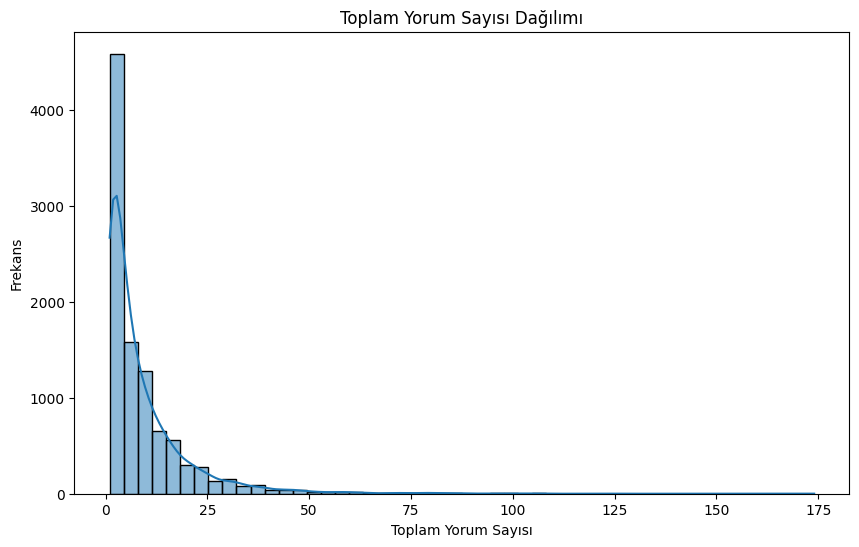

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(df_product_periodic_sentiment['Toplam Yorum Sayısı'], bins=50, kde=True)
plt.title('Toplam Yorum Sayısı Dağılımı')
plt.xlabel('Toplam Yorum Sayısı')
plt.ylabel('Frekans')
plt.show()

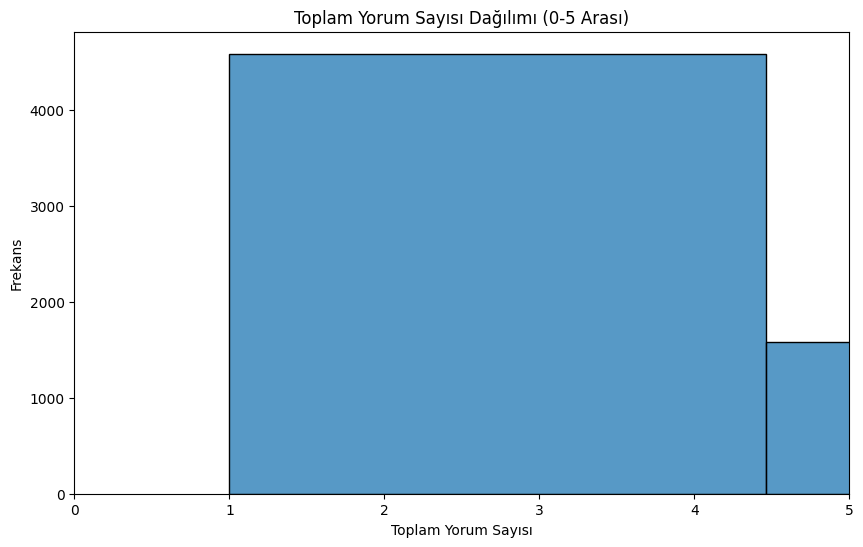

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(df_product_periodic_sentiment['Toplam Yorum Sayısı'], bins=50, kde=False)
plt.xlim(0, 5)
plt.title('Toplam Yorum Sayısı Dağılımı (0-5 Arası)')
plt.xlabel('Toplam Yorum Sayısı')
plt.ylabel('Frekans')
plt.show()


In [ ]:
df_az_yorum = df_product_periodic_sentiment[df_product_periodic_sentiment['Toplam Yorum Sayısı'] < 3]
df_az_yorum.head()

,Ürün Adı,Yıl_Ay,Olumlu Yorum Sayısı,Toplam Yorum Sayısı,Olumlu Oranı
0,Edit by Trendyol Siyah Vücuda Oturan Asimetrik Yaka Örme Kısa Elbise TEDAW25EL00006,2024-08,1,1,1.0
8,TRENDYOLMİLLA Altın Vücuda Oturan Parıltılı Örme Pullu Payet Kısa Şık Abiye Elbise TPRAW24EL00159,2023-09,1,1,1.0
12,TRENDYOLMİLLA Altın Vücuda Oturan Parıltılı Örme Pullu Payet Kısa Şık Abiye Elbise TPRAW24EL00159,2024-01,1,2,0.5
13,TRENDYOLMİLLA Altın Vücuda Oturan Parıltılı Örme Pullu Payet Kısa Şık Abiye Elbise TPRAW24EL00159,2024-02,1,1,1.0
14,TRENDYOLMİLLA Altın Vücuda Oturan Parıltılı Örme Pullu Payet Kısa Şık Abiye Elbise TPRAW24EL00159,2024-03,2,2,1.0


In [ ]:
donem_bazlı_az_yorumlu_urunler = df_az_yorum['Ürün Adı'].unique()

eksik_urunler_df = df_products_times_and_labels[df_products_times_and_labels['Ürün Adı'].isin(donem_bazlı_az_yorumlu_urunler)]

eksik_urunler_df.head(10)

,Ürün Adı,Adet,min_date,max_date,date_diff,olumlu_sayi,olumsuz_sayi
0,TRENDYOLMİLLA Siyah Vücuda Oturan Degaje Yaka Midi Askılı Esnek Örme Midi Kalem Elbise TWOSS19AD0020,885,2022-03-22,2025-02-17,1063,802,83
1,TRENDYOLMİLLA Siyah Vücuda Oturan Mini Dik Yaka Fitilli Esnek Örme Kalem Elbise TWOAW21EL2244,712,2022-03-21,2025-03-10,1085,614,98
2,TRENDYOLMİLLA Siyah Fitted/ Vücuda Oturan Kolsuz Drape Detaylı Kemerli Midi Esnek Örme Kalem Elbise TWOSS22EL0756,706,2022-03-24,2025-03-07,1079,667,39
3,TRENDYOLMİLLA Lacivert Vücuda Oturan Degaje Yaka Midi Askılı Esnek Örme Midi Kalem Elbise TWOSS19AD0020,540,2022-03-13,2025-02-27,1082,518,22
4,TRENDYOLMİLLA Siyah Fitilli Kare Yaka Vücuda Oturan Uzun Kol Yırtmaçlı Midi Elbise TWOAW22EL0871,504,2022-04-15,2025-03-10,1060,451,53
5,TRENDYOLMİLLA Çok Renkli Çiçekli Eteği Volanlı Skater/Belden Açılan Şifon Mini Astarlı Dokuma Elbise TWOSS22EL2772,497,2022-05-05,2025-01-09,980,451,46
6,TRENDYOLMİLLA Siyah Tüvit A Kesim Mini Şifon Kol Detaylı Dokuma Elbise TWOAW21EL0532,487,2022-03-13,2025-03-09,1092,403,84
7,Trendyol Curve Siyah Dokuma Yırtmaçlı Elbise TBBSS22AH0012,486,2022-03-31,2025-03-10,1075,443,43
8,TRENDYOLMİLLA Turuncu Baskıılı Vücuda Oturan Midi Tek Omuz Ayarlanabilir Askılı Örme Kalem Elbise TWOSS23EL01577,472,2023-04-03,2025-03-10,707,408,64
9,TRENDYOLMİLLA Mor Fitted/ Vücuda Oturan Kolsuz Drape Detaylı Kemerli Midi Esnek Örme Kalem Elbise TWOSS22EL0756,466,2022-03-22,2025-03-07,1081,447,19


In [ ]:
df_products_times_and_labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 522 entries, 0 to 521
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Ürün Adı      522 non-null    object
 1   Adet          522 non-null    int64 
 2   min_date      522 non-null    object
 3   max_date      522 non-null    object
 4   date_diff     522 non-null    int64 
 5   olumlu_sayi   522 non-null    int64 
 6   olumsuz_sayi  522 non-null    int64 
dtypes: int64(4), object(3)
memory usage: 28.7+ KB


In [ ]:
eksik_urunler_df.info()
## Buradan 1 dönemde sadece 1 yorumu olanları atmanın çok büyük bir veri kaybı olduğu ortaya çıkıyor.

<class 'pandas.core.frame.DataFrame'>
Index: 505 entries, 0 to 521
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Ürün Adı      505 non-null    object
 1   Adet          505 non-null    int64 
 2   min_date      505 non-null    object
 3   max_date      505 non-null    object
 4   date_diff     505 non-null    int64 
 5   olumlu_sayi   505 non-null    int64 
 6   olumsuz_sayi  505 non-null    int64 
dtypes: int64(4), object(3)
memory usage: 31.6+ KB


In [ ]:
urun_bazli_ay_sayisi = (
    df_product_periodic_sentiment
    .groupby('Ürün Adı')['Yıl_Ay']
    .nunique()
    .reset_index(name='Farklı_Ay_Sayısı')
    .sort_values(by='Farklı_Ay_Sayısı', ascending=False)
)

urun_bazli_ay_sayisi.head()

,Ürün Adı,Farklı_Ay_Sayısı
344,TRENDYOLMİLLA Siyah Vücuda Oturan Degaje Yaka Midi Askılı Esnek Örme Midi Kalem Elbise TWOSS19AD0020,36
332,TRENDYOLMİLLA Siyah Tüvit A Kesim Mini Şifon Kol Detaylı Dokuma Elbise TWOAW21EL0532,36
299,TRENDYOLMİLLA Siyah Kuşaklı Kruvaze Dokuma Elbise TWOAW20EL0789,36
333,TRENDYOLMİLLA Siyah Tüvit Dokuma Elbise TWOAW21EL0454,36
363,TRENDYOLMİLLA Siyah Vücuda Oturan Yırtmaçlı Bisiklet Yaka Midi Fitilli Esnek Örme Kalem Elbise TWOAW21EL0135,35


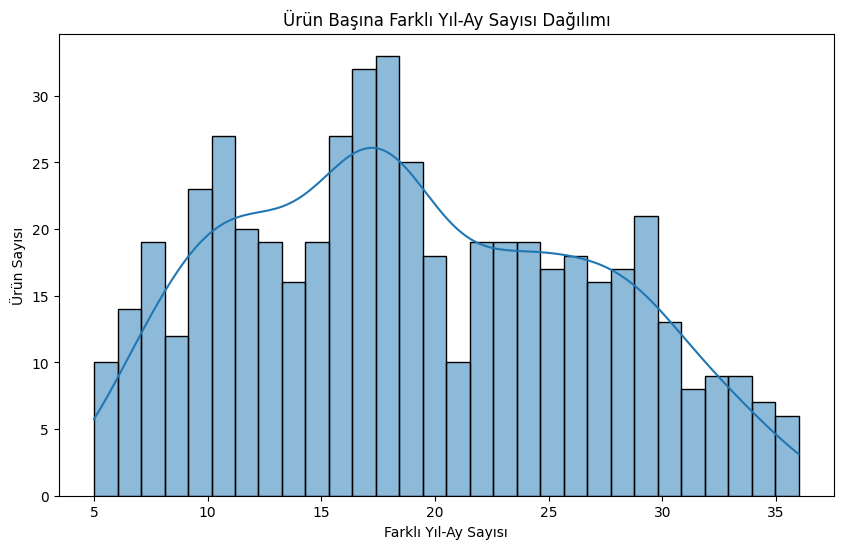

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(urun_bazli_ay_sayisi['Farklı_Ay_Sayısı'], bins=30, kde=True)
plt.title('Ürün Başına Farklı Yıl-Ay Sayısı Dağılımı')
plt.xlabel('Farklı Yıl-Ay Sayısı')
plt.ylabel('Ürün Sayısı')
plt.show()

In [ ]:
urun_bazli_ay_sayisi[urun_bazli_ay_sayisi["Farklı_Ay_Sayısı"]==5]

,Ürün Adı,Farklı_Ay_Sayısı
233,TRENDYOLMİLLA Siyah Animal Shift Shally Maxi Dokuma Elbise TWOSS24EL00872,5
409,TRENDYOLMİLLA Zümrüt Yeşili Çiçek Baskılı Mini Selanik Dik Yaka Örme Elbise TWOAW25EL00282,5
32,TRENDYOLMİLLA Bordo Çiçek Baskılı Mini Selanik Dik Yaka Örme Elbise TWOAW25EL00282,5


In [ ]:
df_product_periodic_sentiment[df_product_periodic_sentiment["Ürün Adı"]=='TRENDYOLMİLLA Zümrüt Yeşili Çiçek Baskılı Mini Selanik Dik Yaka Örme Elbise TWOAW25EL00282']

,Ürün Adı,Yıl_Ay,Olumlu Yorum Sayısı,Toplam Yorum Sayısı,Olumlu Oranı
7660,TRENDYOLMİLLA Zümrüt Yeşili Çiçek Baskılı Mini Selanik Dik Yaka Örme Elbise TWOAW25EL00282,2024-11,17,19,0.894737
7661,TRENDYOLMİLLA Zümrüt Yeşili Çiçek Baskılı Mini Selanik Dik Yaka Örme Elbise TWOAW25EL00282,2024-12,31,33,0.939394
7662,TRENDYOLMİLLA Zümrüt Yeşili Çiçek Baskılı Mini Selanik Dik Yaka Örme Elbise TWOAW25EL00282,2025-01,22,24,0.916667
7663,TRENDYOLMİLLA Zümrüt Yeşili Çiçek Baskılı Mini Selanik Dik Yaka Örme Elbise TWOAW25EL00282,2025-02,7,7,1.000000
7664,TRENDYOLMİLLA Zümrüt Yeşili Çiçek Baskılı Mini Selanik Dik Yaka Örme Elbise TWOAW25EL00282,2025-03,3,3,1.000000


Bazı Dönemlerde Bir Adet Yorumu Olan Ürünler

In [ ]:
df_product_periodic_sentiment[df_product_periodic_sentiment["Ürün Adı"]=='TRENDYOLMİLLA Siyah Vücuda Oturan Degaje Yaka Midi Askılı Esnek Örme Midi Kalem Elbise TWOSS19AD0020']

,Ürün Adı,Yıl_Ay,Olumlu Yorum Sayısı,Toplam Yorum Sayısı,Olumlu Oranı
6443,TRENDYOLMİLLA Siyah Vücuda Oturan Degaje Yaka Midi Askılı Esnek Örme Midi Kalem Elbise TWOSS19AD0020,2022-03,5,5,1.000000
6444,TRENDYOLMİLLA Siyah Vücuda Oturan Degaje Yaka Midi Askılı Esnek Örme Midi Kalem Elbise TWOSS19AD0020,2022-04,25,25,1.000000
6445,TRENDYOLMİLLA Siyah Vücuda Oturan Degaje Yaka Midi Askılı Esnek Örme Midi Kalem Elbise TWOSS19AD0020,2022-05,65,75,0.866667
6446,TRENDYOLMİLLA Siyah Vücuda Oturan Degaje Yaka Midi Askılı Esnek Örme Midi Kalem Elbise TWOSS19AD0020,2022-06,79,86,0.918605
6447,TRENDYOLMİLLA Siyah Vücuda Oturan Degaje Yaka Midi Askılı Esnek Örme Midi Kalem Elbise TWOSS19AD0020,2022-07,14,17,0.823529
6448,TRENDYOLMİLLA Siyah Vücuda Oturan Degaje Yaka Midi Askılı Esnek Örme Midi Kalem Elbise TWOSS19AD0020,2022-08,14,14,1.000000
6449,TRENDYOLMİLLA Siyah Vücuda Oturan Degaje Yaka Midi Askılı Esnek Örme Midi Kalem Elbise TWOSS19AD0020,2022-09,4,5,0.800000
6450,TRENDYOLMİLLA Siyah Vücuda Oturan Degaje Yaka Midi Askılı Esnek Örme Midi Kalem Elbise TWOSS19AD0020,2022-10,6,6,1.000000
6451,TRENDYOLMİLLA Siyah Vücuda Oturan Degaje Yaka Midi Askılı Esnek Örme Midi Kalem Elbise TWOSS19AD0020,2022-11,4,5,0.800000
6452,TRENDYOLMİLLA Siyah Vücuda Oturan Degaje Yaka Midi Askılı Esnek Örme Midi Kalem Elbise TWOSS19AD0020,2022-12,1,1,1.000000


In [ ]:
df = df_product_periodic_sentiment[df_product_periodic_sentiment['Ürün Adı'] == 'TRENDYOLMİLLA Siyah Vücuda Oturan Degaje Yaka Midi Askılı Esnek Örme Midi Kalem Elbise TWOSS19AD0020']

print(df['Olumlu Oranı'].dtype)

float64


In [ ]:
df['Yıl_Ay'] = df['Yıl_Ay'].dt.to_timestamp()

C:\Users\SILA\AppData\Local\Temp\ipykernel_12320\1786389611.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Yıl_Ay'] = df['Yıl_Ay'].dt.to_timestamp()


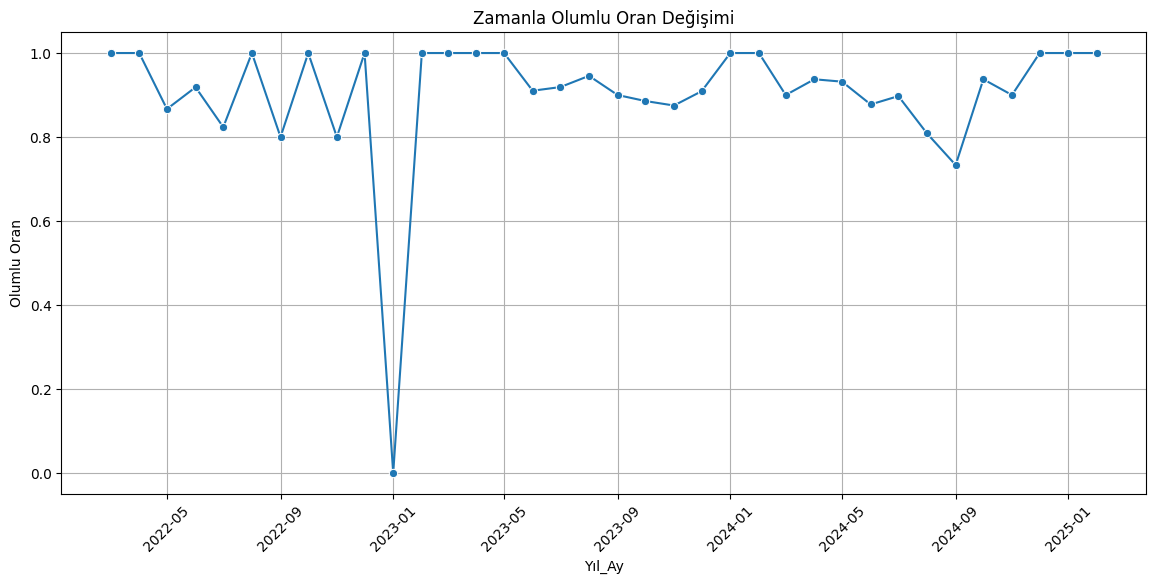

In [ ]:

plt.figure(figsize=(14,6))
sns.lineplot(data=df, x='Yıl_Ay', y='Olumlu Oranı', marker='o')
plt.xticks(rotation=45)
plt.title('Zamanla Olumlu Oran Değişimi')
plt.ylabel('Olumlu Oran')
plt.xlabel('Yıl_Ay')
plt.grid(True)
plt.show()

In [ ]:
def group_periods(df, group_size=3):
    df = df.sort_values('Yıl_Ay').copy()
    df['period_group'] = np.arange(len(df)) // group_size
    
    grouped = df.groupby('period_group').agg({
        'Yıl_Ay': ['min', 'max'],
        'Toplam Yorum Sayısı': 'sum',
        'Olumlu Yorum Sayısı': 'sum'
    })
    
    grouped.columns = ['Yıl_Ay_Min', 'Yıl_Ay_Max', 'Toplam Yorum Sayısı', 'Olumlu Yorum Sayısı']
    grouped = grouped.reset_index(drop=True)
    
    grouped['Olumlu Oranı'] = grouped['Olumlu Yorum Sayısı'] / grouped['Toplam Yorum Sayısı']
    
    return grouped

urun_df = df_product_periodic_sentiment[df_product_periodic_sentiment['Ürün Adı'] == 'TRENDYOLMİLLA Siyah Vücuda Oturan Degaje Yaka Midi Askılı Esnek Örme Midi Kalem Elbise TWOSS19AD0020']
grouped_urun = group_periods(urun_df, group_size=3)
grouped_urun

,Yıl_Ay_Min,Yıl_Ay_Max,Toplam Yorum Sayısı,Olumlu Yorum Sayısı,Olumlu Oranı
0,2022-03,2022-05,105,95,0.904762
1,2022-06,2022-08,117,107,0.914530
2,2022-09,2022-11,16,14,0.875000
3,2022-12,2023-02,3,2,0.666667
4,2023-03,2023-05,25,25,1.000000
5,2023-06,2023-08,244,226,0.926230
6,2023-09,2023-11,89,79,0.887640
7,2023-12,2024-02,13,12,0.923077
8,2024-03,2024-05,86,80,0.930233
9,2024-06,2024-08,135,116,0.859259


In [ ]:
def group_periods_productwise(df, group_size=3):
    def group_func(product_df):
        product_df = product_df.sort_values('Yıl_Ay').copy()
        product_df['period_group'] = np.arange(len(product_df)) // group_size
        
        grouped = product_df.groupby('period_group').agg({
            'Yıl_Ay': ['min', 'max'],
            'Toplam Yorum Sayısı': 'sum',
            'Olumlu Yorum Sayısı': 'sum'
        })
        grouped.columns = ['Yıl_Ay_Min', 'Yıl_Ay_Max', 'Toplam Yorum Sayısı', 'Olumlu Yorum Sayısı']
        grouped = grouped.reset_index(drop=True)
        grouped['Olumlu Oranı'] = grouped['Olumlu Yorum Sayısı'] / grouped['Toplam Yorum Sayısı']
        
        grouped['Ürün Adı'] = product_df['Ürün Adı'].iloc[0]
        return grouped

    grouped_list = []
    for product_name, group_df in df.groupby('Ürün Adı'):
        grouped_product_df = group_func(group_df)
        grouped_list.append(grouped_product_df)
    
    result_df = pd.concat(grouped_list, ignore_index=True)
    return result_df

grouped_all_products = group_periods_productwise(df_product_periodic_sentiment, group_size=3)

grouped_all_products.head()

,Yıl_Ay_Min,Yıl_Ay_Max,Toplam Yorum Sayısı,Olumlu Yorum Sayısı,Olumlu Oranı,Ürün Adı
0,2024-08,2024-10,13,9,0.692308,Edit by Trendyol Siyah Vücuda Oturan Asimetrik Yaka Örme Kısa Elbise TEDAW25EL00006
1,2024-11,2025-01,62,44,0.709677,Edit by Trendyol Siyah Vücuda Oturan Asimetrik Yaka Örme Kısa Elbise TEDAW25EL00006
2,2025-02,2025-03,15,9,0.600000,Edit by Trendyol Siyah Vücuda Oturan Asimetrik Yaka Örme Kısa Elbise TEDAW25EL00006
3,2023-09,2023-11,28,25,0.892857,TRENDYOLMİLLA Altın Vücuda Oturan Parıltılı Örme Pullu Payet Kısa Şık Abiye Elbise TPRAW24EL00159
4,2023-12,2024-02,9,8,0.888889,TRENDYOLMİLLA Altın Vücuda Oturan Parıltılı Örme Pullu Payet Kısa Şık Abiye Elbise TPRAW24EL00159


In [ ]:
df_product_periodic_sentiment.head()

,Ürün Adı,Yıl_Ay,Olumlu Yorum Sayısı,Toplam Yorum Sayısı,Olumlu Oranı
0,Edit by Trendyol Siyah Vücuda Oturan Asimetrik Yaka Örme Kısa Elbise TEDAW25EL00006,2024-08,1,1,1.000000
1,Edit by Trendyol Siyah Vücuda Oturan Asimetrik Yaka Örme Kısa Elbise TEDAW25EL00006,2024-09,2,3,0.666667
2,Edit by Trendyol Siyah Vücuda Oturan Asimetrik Yaka Örme Kısa Elbise TEDAW25EL00006,2024-10,6,9,0.666667
3,Edit by Trendyol Siyah Vücuda Oturan Asimetrik Yaka Örme Kısa Elbise TEDAW25EL00006,2024-11,20,23,0.869565
4,Edit by Trendyol Siyah Vücuda Oturan Asimetrik Yaka Örme Kısa Elbise TEDAW25EL00006,2024-12,11,21,0.523810


In [ ]:
comment_path = os.path.join(os.path.expanduser("~"), "Desktop\\TrendyolMilla\\04_Data_Time_Series\\Data")
file_name = "product_periodic_sentiment.csv"
file_path = os.path.join(comment_path, file_name)
df_product_periodic_sentiment.to_csv(file_path, index=False) 
print(f"{file_name} olarak kaydedildi.") 

product_periodic_sentiment.csv olarak kaydedildi.


In [ ]:
desired_order = ['Ürün Adı', 'Yıl_Ay_Min', 'Yıl_Ay_Max', 'Olumlu Yorum Sayısı', 'Toplam Yorum Sayısı', 'Olumlu Oranı']

grouped_all_products = grouped_all_products[desired_order]

grouped_all_products.head()

,Ürün Adı,Yıl_Ay_Min,Yıl_Ay_Max,Olumlu Yorum Sayısı,Toplam Yorum Sayısı,Olumlu Oranı
0,Edit by Trendyol Siyah Vücuda Oturan Asimetrik Yaka Örme Kısa Elbise TEDAW25EL00006,2024-08,2024-10,9,13,0.692308
1,Edit by Trendyol Siyah Vücuda Oturan Asimetrik Yaka Örme Kısa Elbise TEDAW25EL00006,2024-11,2025-01,44,62,0.709677
2,Edit by Trendyol Siyah Vücuda Oturan Asimetrik Yaka Örme Kısa Elbise TEDAW25EL00006,2025-02,2025-03,9,15,0.600000
3,TRENDYOLMİLLA Altın Vücuda Oturan Parıltılı Örme Pullu Payet Kısa Şık Abiye Elbise TPRAW24EL00159,2023-09,2023-11,25,28,0.892857
4,TRENDYOLMİLLA Altın Vücuda Oturan Parıltılı Örme Pullu Payet Kısa Şık Abiye Elbise TPRAW24EL00159,2023-12,2024-02,8,9,0.888889


In [ ]:
comment_path = os.path.join(os.path.expanduser("~"), "Desktop\\TrendyolMilla\\04_Data_Time_Series\\Data")
file_name = "product_periodic_group_sentiment.csv"
file_path = os.path.join(comment_path, file_name)
grouped_all_products.to_csv(file_path, index=False) 
print(f"{file_name} olarak kaydedildi.") 

product_periodic_group_sentiment.csv olarak kaydedildi.
